<div style="background-color:white; text-align:center; padding:20px;">
    <h2 style="color:black; font-family: Verdana, sans-serif;"><strong>Creating an LLM to get sustainable solutions</strong></h2>
    <p style="font-size: 14px; color: black; font-family: Verdana, sans-serif;"> 
        <table style="margin: auto; border-collapse: collapse;">
            <tr>
                <th style="border: 0;">Names</th>
                <th style="border: 0;">GitHub Username</th>
            </tr>
            <tr>
                <td style="border: 0;">Vince Ammerlaan</td>
                <td style="border: 0;">Vince16270</td>
            </tr>
            <tr>
                <td style="border: 0;">Tommi Lander</td>
                <td style="border: 0;">Tommi7</td>
            </tr>
            <tr>
                <td style="border: 0;">Nima Ghafar</td>
                <td style="border: 0;">NimaGhafar</td>
            </tr>
            <tr>
                <td style="border: 0;">Jort Akershoek</td>
                <td style="border: 0;">JortAkershoek</td>
            </tr>
        </table>
    </p>
</div>

<div style="display: flex; justify-content: center; align-items: center; margin-top:20px;">
    <img src="https://static.vecteezy.com/system/resources/previews/017/306/579/original/esg-sustainability-concept-illustration-vector.jpg" alt="genres" style="width: 600px; height: auto;">
</div>

- Client: Mathis Mourey 
- Instructors: Mirabai Vosteen and Beata Skuczynska
- Date: ..-06-2025

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Table of contents </strong></h2>
</div>
<ul style="padding: 0; list-style: none;">
    <li style="text-align: center;"><a href="#1.0">Chapter 1: The Project</a></li>
    <li style="text-align: center;"><a href="#1.0">Chapter 2: Loading Packages, Self-defined functions and the Data</a></li>
    <li style="text-align: center;"><a href="#2.0">Chapter 3: Exploratory Data Analysis</a></li>
    <li style="text-align: center;"><a href="#3.0">Chapter 4: Data Preprocessing</a></li>
    <li style="text-align: center;"><a href="#6.0">Chapter 5: The Model</a></li>
    <li style="text-align: center;"><a href="#5.0">Chapter 6: Testing the model</a></li>
    <li style="text-align: center;"><a href="#7.0">Chapter 7: Evaluating the model</a></li>
    <li style="text-align: center;"><a href="#7.0">Chapter 8: Results and Conclusions</a></li>
    <li style="text-align: center;"><a href="#8.0">Chapter 9: Sources</a></li>
</ul>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 1: The Project </strong></h2>

</ul>

In this project, we focus on improving the accessibility of policy information related to the energy transition. Governments across Europe and the Netherlands publish numerous policy documents, regulations, and reports to support the shift toward renewable energy sources. These documents are often technical, extensive, and written in academic or legal language, making it difficult for citizens to understand their content. As a result, they miss out on important information about subsidies, regulations, or their own role in the energy transition.

To address this problem, we are developing a chatbot powered by a Large Language Model (LLM). This chatbot is capable of automatically analyzing, summarizing, and translating government documents into plain and understandable language. Users can ask questions through a simple interface, and the chatbot provides clear answers based on factual information.

Our approach consists of collecting policy documents in PDF format, preprocessing the texts using NLP techniques such as tokenization and filtering, and leveraging a powerful pretrained LLM for text processing. Instead of training a model from scratch, we utilize a pretrained model and Retrieval-Augmented Generation (RAG) to generate relevant answers. The generated responses are evaluated based on their clarity, relevance, and reliability.

With this tool, we aim to contribute to a better-informed society in which citizens have easy access to simplified yet essential information. In doing so, we not only increase public engagement in the energy transition, but also strengthen support for sustainable policy.

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 2: Loading Packages, Self-defined functions and the Data</strong></h2>

</ul>

**Packages**

- This section of the notebook covers the necessary Python packages required for our deep learning models. Below is a list of the key packages used

In [1]:
import os
import re
import nltk
import json
import torch
import faiss
import string
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation, PCA
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM
from sentence_transformers import SentenceTransformer
from accelerate import init_empty_weights, load_checkpoint_and_dispatch

**Self defined functions**

- This section contains our self defined functions that are essential for our project. These functions are written to streamline repetitive tasks and enhance code readability.

In [2]:
def extract_text_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        return text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None

In [3]:
def count_stopwords(text):
    words = text.split()
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    return stopword_count

In [4]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text) 
    text = re.sub(r'[^\w\s.,!?]', '', text)
    text = text.strip()
    return text

In [5]:
def chunk_text(text, max_tokens, tokenizer):
    tokens = tokenizer.tokenize(text)
    chunks = []
    for i in range(0, len(tokens), max_tokens):
        chunk = tokens[i:i + max_tokens]
        chunks.append(tokenizer.convert_tokens_to_string(chunk))
    return chunks

**Loading the text from the PDF files**

- Here we load the text from the different PDF files into text format.

In [6]:
pdf_dir = os.path.join("..", "Data", "European_policies")

data = []
for file_name in os.listdir(pdf_dir):
    if file_name.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, file_name)
        text = extract_text_from_pdf(file_path)
        if text:
            data.append({"file_name": file_name, "text": text})

df = pd.DataFrame(data)

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 3: Exploratory Data Analysis </strong></h2>
</div>

**Basic information**

- In this section, we check how much data we have and we give a sample of the data.

In [7]:
print("Number of PDF files processed:", len(df))
print("Sample data:")
print(df.head())

Number of PDF files processed: 9
Sample data:
                                           file_name  \
0                          OJ_L_202302413_EN_TXT.pdf   
1  cellar_fc930f14-d7ae-11ec-a95f-01aa75ed71a1.00...   
2                        CELEX_32019L0944_EN_TXT.pdf   
3                          OJ_L_202401275_EN_TXT.pdf   
4                        CELEX_32023L1791_EN_TXT.pdf   

                                                text  
0  ELI: http://data.europa.eu/eli/dir/2023/2413/o...  
1   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...  
2  DIRECTIVES \nDIRECTIVE (EU) 2019/944 OF THE EU...  
3  DIRECTIVE (EU) 2024/1275 OF THE EUR OPEAN PARL...  
4  I\n(Legislative acts)\nDIRECTIVES\nDIRECTIVE (...  


**Text lengths**

- In this section, we check the lengths of the different PDF's. The text length is the amount letters used in a PDF.

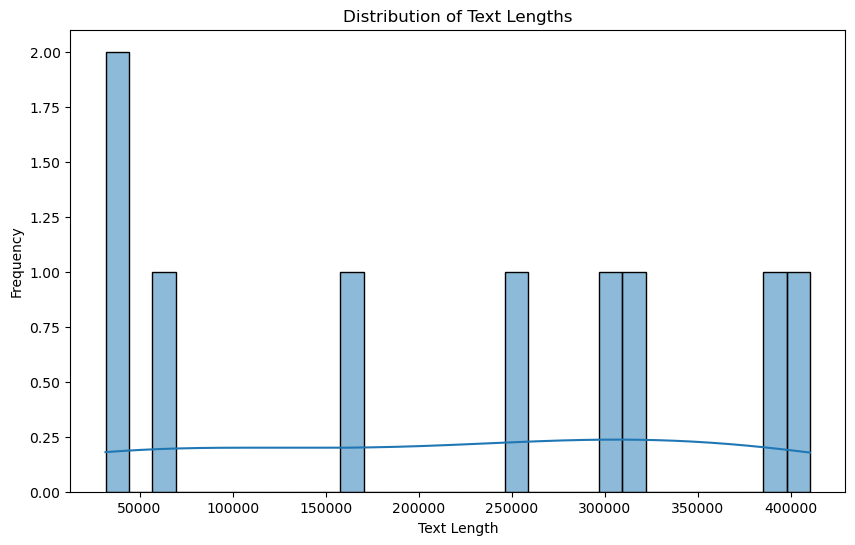

In [8]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

**Word cloud**

- In this section, we check the word clouds. In the word clouds you can see which word is used the most.

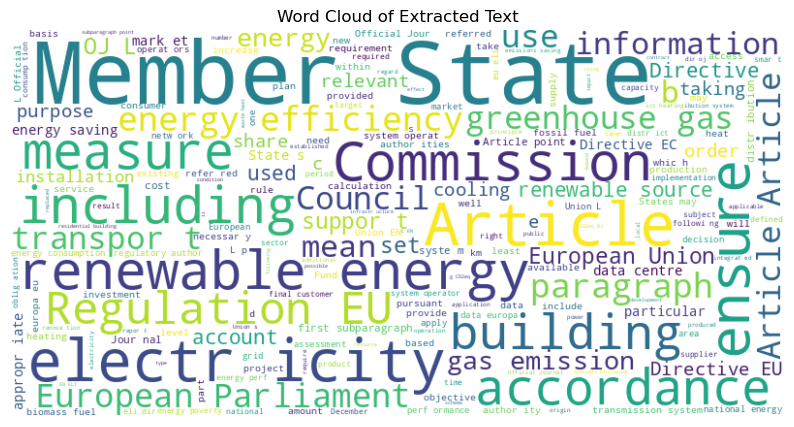

In [9]:
all_text = " ".join(df['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Extracted Text")
plt.show()

**Stop words**

- In this section, we count the stopword for the different PDF's. And we calculate the percentage of the stopwords compared to the total.

In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['stopword_count'] = df['text'].apply(count_stopwords)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['stopword_percentage'] = df['stopword_count'] / df['word_count'] * 100

display(df)

[nltk_data] Downloading package stopwords to /Users/vince/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


file_name  \
0                          OJ_L_202302413_EN_TXT.pdf   
1  cellar_fc930f14-d7ae-11ec-a95f-01aa75ed71a1.00...   
2                        CELEX_32019L0944_EN_TXT.pdf   
3                          OJ_L_202401275_EN_TXT.pdf   
4                        CELEX_32023L1791_EN_TXT.pdf   
5                          OJ_L_202401364_EN_TXT.pdf   
6                        CELEX_32023R0955_EN_TXT.pdf   
7  cellar_71767319-9f0a-11ec-83e1-01aa75ed71a1.00...   
8                        CELEX_32018L2001_EN_TXT.pdf   

                                                text  text_length  word_count  \
0  ELI: http://data.europa.eu/eli/dir/2023/2413/o...       317288       51603   
1   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...        61198        9221   
2  DIRECTIVES \nDIRECTIVE (EU) 2019/944 OF THE EU...       297304       48925   
3  DIRECTIVE (EU) 2024/1275 OF THE EUR OPEAN PARL...       249066       39342   
4  I\n(Legislative acts)\nDIRECTIVES\nDIRECTIVE (...       388256       58299   
5  COMMISSION DELEGATED REGUL ATION (EU) 2024/136...        40383        6181   
6  I\n(Legislative acts)\nREGUL ATIONS\nREGUL ATI...       168580       27183   
7   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...        31713        4902   
8  DIRECTIVES \nDIRECTIVE (EU) 2018/2001 OF THE E...       410355       69423   

   stopword_count  stopword_percentage  
0           18475            35.802182  
1            3253            35.278169  
2           17671            36.118549  
3           13103            33.305373  
4           20570            35.283624  
5            2135            34.541336  
6           10081            37.085679  
7            1693            34.536924  
8           22054            31.767570

**Stop words for each PDF file**

- In this section, we check the percentage of the stopwords for each PDF.

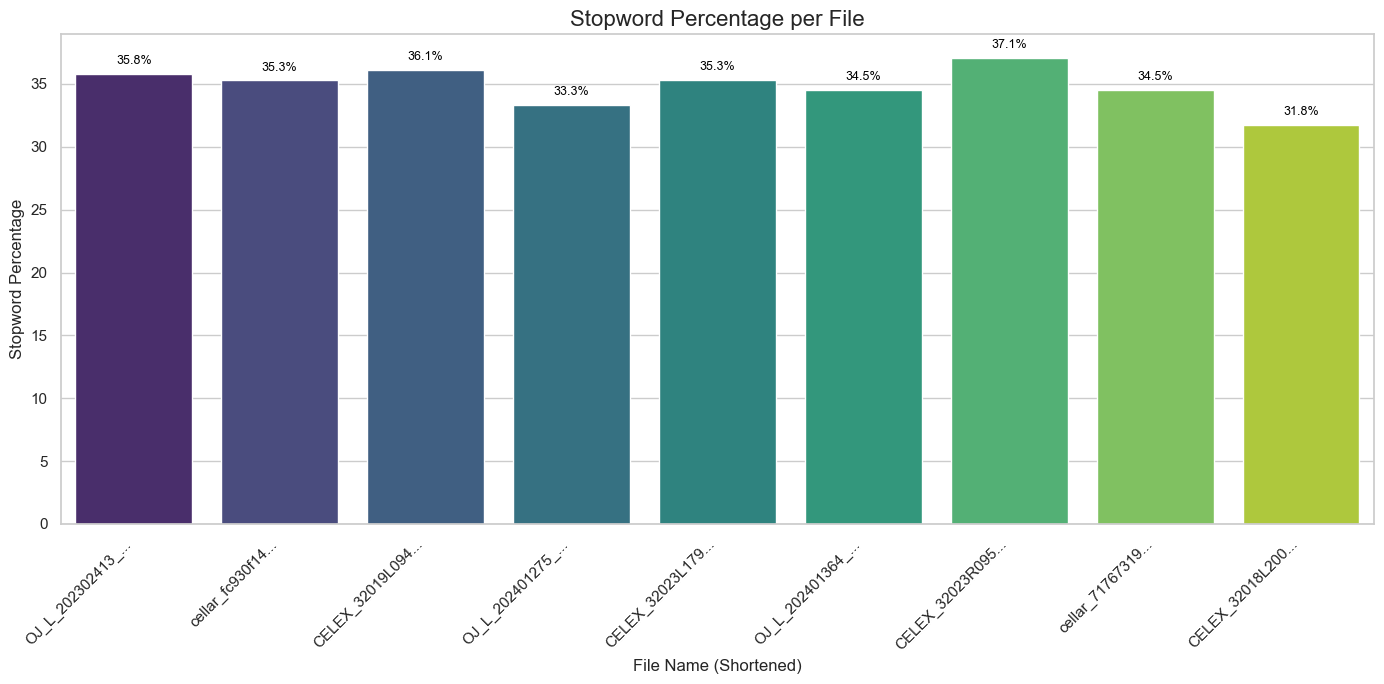

In [13]:
df_plot = df.copy()

df_plot['short_file_name'] = df_plot['file_name'].apply(lambda x: x[:15] + '...' if len(x) > 15 else x)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='short_file_name', y='stopword_percentage', data=df_plot, palette='viridis')

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Stopword Percentage per File', fontsize=16)
plt.ylabel('Stopword Percentage', fontsize=12)
plt.xlabel('File Name (Shortened)', fontsize=12)

plt.tight_layout()
plt.show()

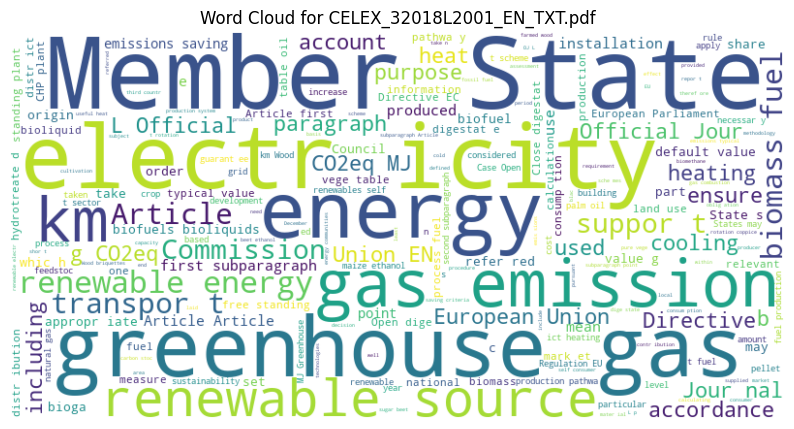

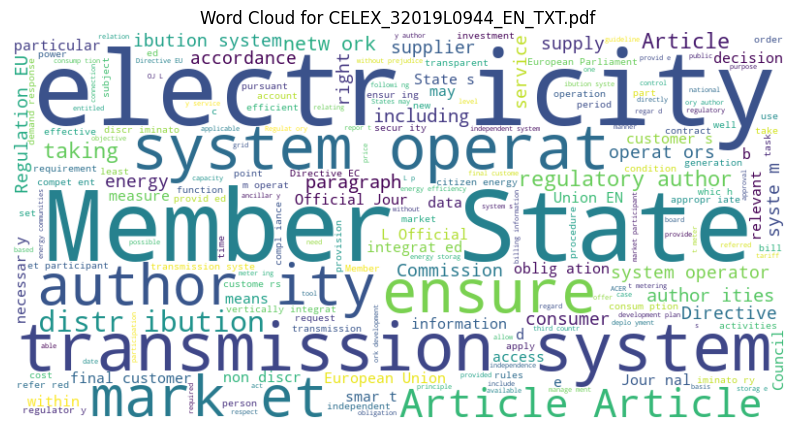

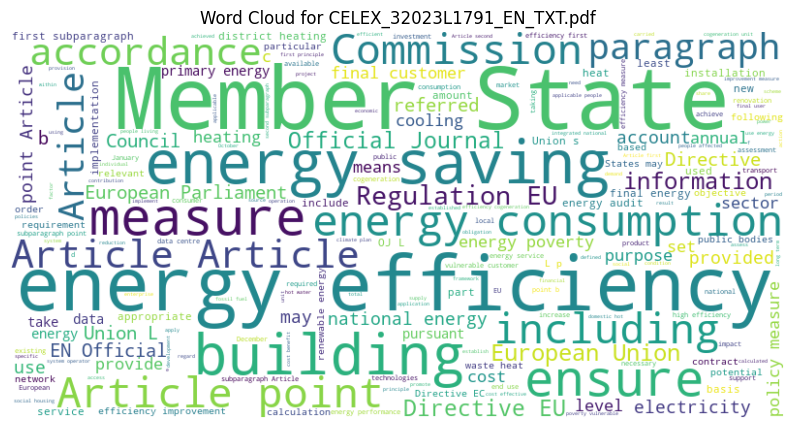

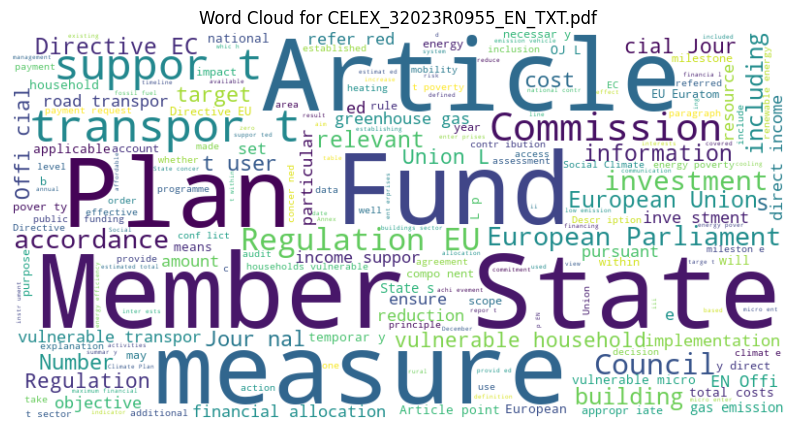

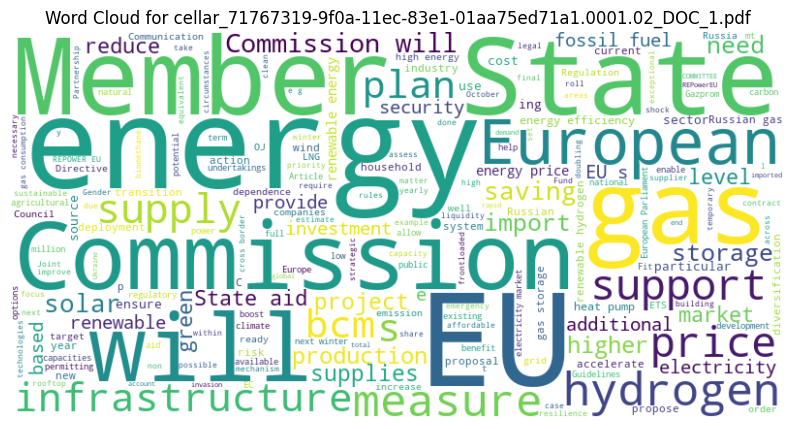

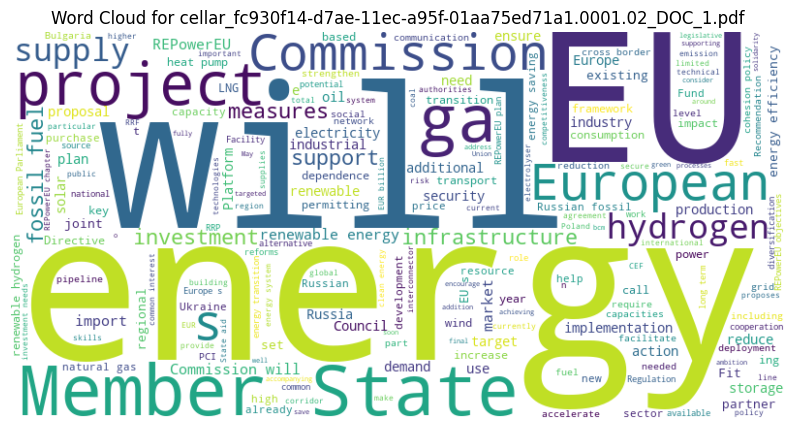

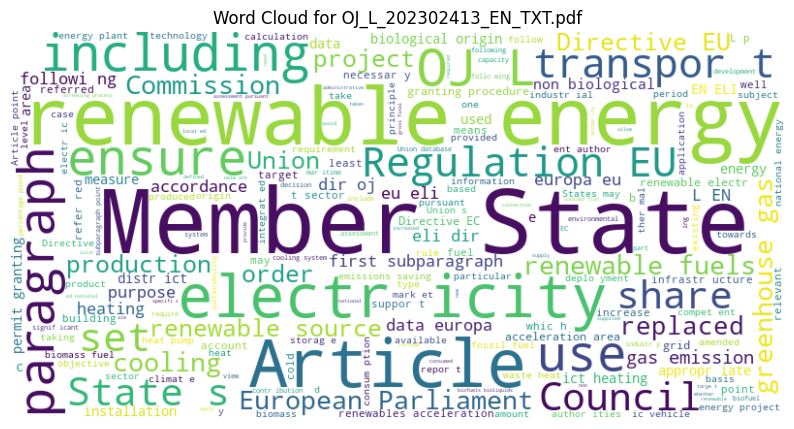

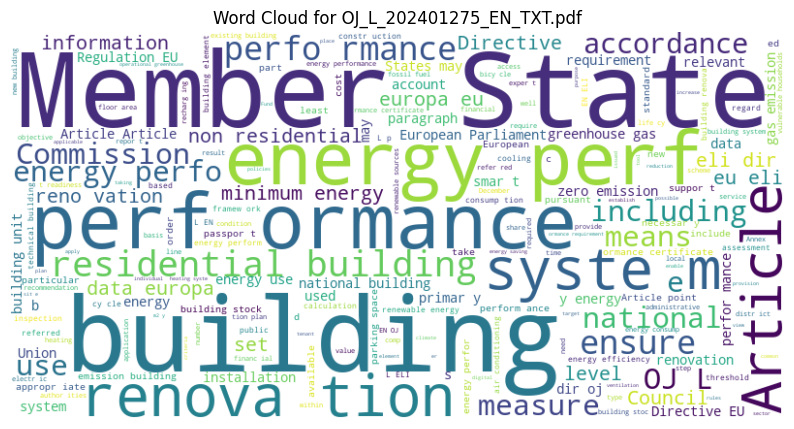

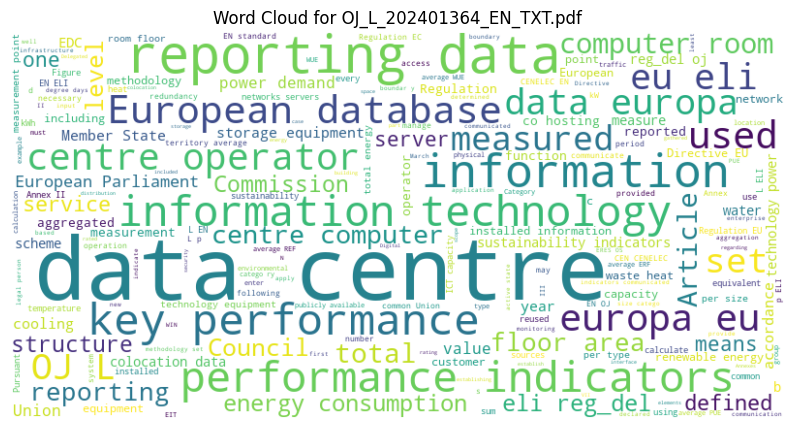

In [12]:
for index, row in df.iterrows():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(row['text'])
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {row['file_name']}")
    plt.show()

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 4: Data Preprocessing </strong></h2>
</div>

We slaan onze DataFrame, dit doen we voor later gebruik

In [13]:
output_path = "processed_data.csv"
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to processed_data.csv


We verwijderen rare tekens en whitespaces. Veel beleidsdocumenten bevatten rare tekens of opmaak. Opschonen maakt de input beter voor chunking en embeddings. 
Daarna splitsen lange tekst op in kleinere stukken tekst (chunks) van maximaal max_tokens tokens, zodat ze in een LLM passen.
Veel LLM's. Chunking zorgt ervoor dat we binnen die limiet blijven.

Blog, D. C. (2025, February 27). 5 Approaches to solve LLM token Limits | DeepChecks. Deepchecks. https://www.deepchecks.com/5-approaches-to-solve-llm-token-limits/

We laden een tokenizer (GPT-2 in dit geval) en stelt het maximum tokens per chunk in.

In [14]:
tokenizer_name = "gpt2"  
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
max_tokens = 512

We passen `clean_text` en `chunk_text` toe op elke rij in df.

Daarna slaan we alle chunks op in JSONL formaat. elke regel is 1 sample (chunk).

In [15]:
data =[]
for i, row in df.iterrows():
    text = row['text']
    text = clean_text(text)
    chunks = chunk_text(text, max_tokens, tokenizer)
    for i, chunk in enumerate(chunks):
        data.append({'file_name': row['file_name'], 'chunk_id': i, 'text': chunk})
        
if 'clean_text' not in df.columns:
    df['clean_text'] = df['text'].apply(clean_text) 

df_processed = pd.DataFrame(data)
output_path = "processed_data_chunks.json"
df_processed.to_json(output_path, orient='records', lines=True)
print(f"Processed data saved to {output_path}")

Token indices sequence length is longer than the specified maximum sequence length for this model (89707 > 1024). Running this sequence through the model will result in indexing errors


Processed data saved to processed_data_chunks.json



Topic 1: data, centre, gas, hydrogen, centres, reporting, supply, repowereu, projects, infrastructure

Topic 2: fund, suppor, transpor, vulnerable, plan, households, financial, investments, accordance, costs

Topic 3: buildings, tion, ormance, perf, renova, syste, requirements, means, heating, minimum

Topic 4: savings, consumption, heating, buildings, cooling, accordance, cogeneration, customers, electricity, official

Topic 5: electr, icity, gas, emissions, distr, greenhouse, biomass, operat, transmission, production


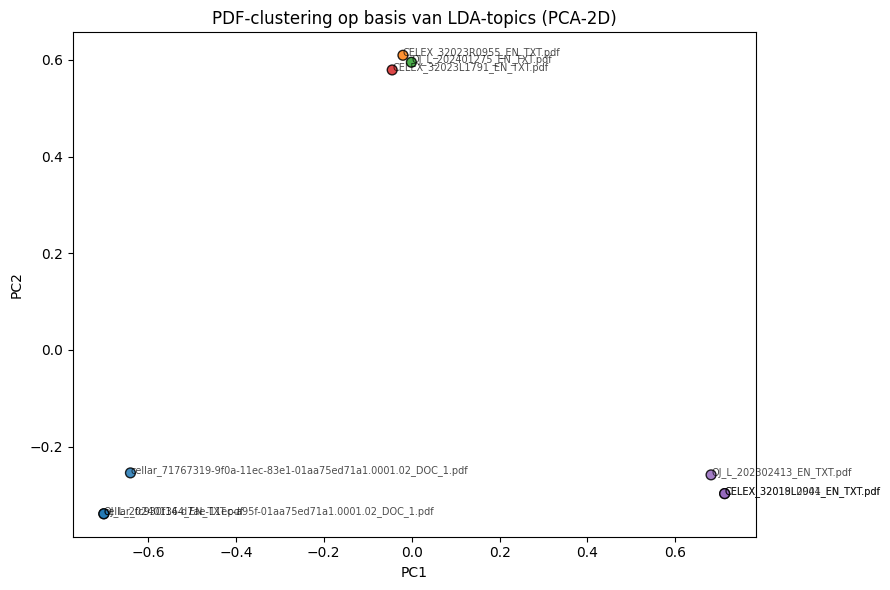

In [16]:
custom_stop = {
    'shall', 'article', 'oj', 'ed',
    'author', 'paragraph', 'subparagraph', 'referred'}

stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop))

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
doc_term_matrix = vectorizer.fit_transform(df['clean_text'])   

n_topics = 5
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    learning_method='batch'
).fit(doc_term_matrix)

def show_topics(model, fnames, topn=10):
    for i, comp in enumerate(model.components_):
        terms = ", ".join(fnames[j] for j in comp.argsort()[-topn:][::-1])
        print(f"\nTopic {i+1}: {terms}")

feature_names = vectorizer.get_feature_names_out()
show_topics(lda, feature_names)

doc_topics = lda.transform(doc_term_matrix)
coords = PCA(n_components=2, random_state=42).fit_transform(doc_topics)

dom_topic = doc_topics.argmax(axis=1)
colors = plt.cm.tab10(dom_topic)

plt.figure(figsize=(9, 6))
plt.scatter(coords[:, 0], coords[:, 1], c=colors, s=50, alpha=0.85, edgecolors="k")

for i, fname in enumerate(df['file_name']):
    plt.annotate(fname, (coords[i, 0], coords[i, 1]), fontsize=7, alpha=0.7)

plt.title("PDF‑clustering op basis van LDA‑topics (PCA‑2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout(); plt.show()

Hier openen wij de chunks als df.

In [17]:
df_chunks = pd.read_json("processed_data_chunks.json", lines=True)

print(df_chunks.head())

                     file_name  chunk_id  \
0  CELEX_32018L2001_EN_TXT.pdf         0   
1  CELEX_32018L2001_EN_TXT.pdf         1   
2  CELEX_32018L2001_EN_TXT.pdf         2   
3  CELEX_32018L2001_EN_TXT.pdf         3   
4  CELEX_32018L2001_EN_TXT.pdf         4   

                                                text  
0  DIRECTIVES DIRECTIVE EU 20182001 OF THE EUR OP...  
1   as technological and industr ial leadership w...  
2   energy policies  and of 23 June 2016 entitled...  
3   period in time where the gap occur red. Both ...  
4   clean technologies, and establish an adequate...  


We maken een lijst chunks van alleen de tekstinhoud uit elk JSON-object. Dit is simpel en snel bruikbaar voor embeddings.

In [18]:
with open("processed_data_chunks.json", "r") as f:
    chunks_data = [json.loads(line) for line in f]

chunks = [items['text'] for items in chunks_data]

We maken embeddings van je chunks met een klein, krachtig model.

**Waarom MiniLM?**

Klein → draait op CPU of laptop

Snel → goed genoeg voor prototyping

sentence-transformers/all-MiniLM-L6-v2 · Hugging Face. (2024, January 5). https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [19]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
chunks_embeddings = embedding_model.encode(chunks, show_progress_bar=True)

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

c:\Users\akers\anaconda3\envs\tf\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


**Wat doet het?**

Initieert een FAISS index voor snelle vectorzoekacties

Voegt chunk-embeddings toe aan de index

**Waarom?**
FAISS maakt het mogelijk om in real-time relevante chunks op te halen voor RAG.

In [20]:
embedding_dim = chunks_embeddings[0].shape[0]
index = faiss.IndexFlatL2(embedding_dim)
index.add(np.array(chunks_embeddings).astype('float32'))

**Wat doet het?**

1. Embed je vraag

2. Zoek de top 5 meest vergelijkbare chunks

3. Combineert ze tot context voor je LLM

**Waarom?**
Door de LLM alleen relevante context te geven, geef je betere antwoorden op vragen.

**Waarom top_k = 5?**
Evenwicht tussen voldoende context en niet te veel tokens. Kun je tunen

In [21]:
user_question = "What is the green deal"
question_embedding = embedding_model.encode([user_question])

In [22]:
top_k = 5
_, indices = index.search(np.array(question_embedding).astype('float32'), top_k)
retreived_chunks = [chunks[i] for i in indices[0]]
context = "\n\n".join(retreived_chunks)

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 5: The Model</strong></h2>
</div>

In [23]:
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base", device_map="auto", torch_dtype="auto")
model.eval()

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

In [24]:
user_question = "What is the green new deal?"
question_embedding = embedding_model.encode([user_question])

_, indices = index.search(np.array(question_embedding).astype('float32'), top_k)
retreived_chunks = [chunks[i] for i in indices[0]]

context = "\n\n".join(retreived_chunks)

rag_prompt = f"""
you're an expert in european policy.
you have access to the following context:
{context}
your question is: {user_question}
answer in detail. 
"""

device = "cuda" if torch.cuda.is_available() else "cpu"
rag_input = tokenizer(rag_prompt, return_tensors="pt").to(device)
output = model.generate(**rag_input, num_return_sequences=1)

response = tokenizer.decode(output[0], skip_special_tokens=True)

Token indices sequence length is longer than the specified maximum sequence length for this model (2367 > 512). Running this sequence through the model will result in indexing errors


In [25]:
print("Response:", response)

Response: The need for greater security of supply is adding a new impetus to the objectives of the


In [26]:
model_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map="auto",
        torch_dtype="auto",
        low_cpu_mem_usage=True,
)
model.eval()

def generate_chat_response(chat_history, user_input, max_new_tokens=256):
     """
     chat_history: list of (speaker, text) tuples
     user_input: string containing the user’s new query
     """
     chat_history.append(("User", user_input))

     prompt_text = ""
     for role, text in chat_history:
          prompt_text += f"{role}: {text}\n"

     inputs = tokenizer(prompt_text, return_tensors="pt").to("cuda")

     output_ids = model.generate(
          **inputs,
          max_new_tokens=max_new_tokens,
          do_sample=True,        
          top_p=0.9,              
          temperature=0.7,        
          pad_token_id=tokenizer.eos_token_id)

     full_output = tokenizer.decode(output_ids[0], skip_special_tokens=True)

     split_responses = full_output.split("Assistant: ")
     if len(split_responses) > 1:
          assistant_reply = split_responses[-1].strip()
     else:
          assistant_reply = full_output

     chat_history.append(("Assistant", assistant_reply))
     return assistant_reply


def chat_loop():
     chat_history = []
     print("Chatbot ready! Type 'exit' to quit.\n")

     while True:
          user_input = input("User: ")
          if user_input.strip().lower() == "exit":
                print("Exiting chat.")
                break
          
          response = generate_chat_response(chat_history, user_input)
          print(f"Assistant: {response}\n")

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
def rag_chat():
    print("Chat ready. Type 'exit' to quit.\n")
    while True:
        user_input = input("User: ")
        if user_input.strip().lower() == "exit":
            print("Exiting chat.")
            break

        question_embedding = embedding_model.encode([user_input])
        _, indices = index.search(np.array(question_embedding).astype('float32'), top_k)
        retrieved_chunks = [chunks[i] for i in indices[0]]
        context = "\n\n".join(retrieved_chunks)

        rag_prompt = f"""you're an expert in european policy.
you have access to the following context:
{context}

Your question is: {user_input}
Answer concisely."""

        device = "cuda" if torch.cuda.is_available() else "cpu"
        inputs = tokenizer(rag_prompt, return_tensors="pt").to(device)
        output_ids = model.generate(
            **inputs,
            max_new_tokens=100, 
            num_beams=1,       
            do_sample=False,     
            pad_token_id=tokenizer.eos_token_id
        )
        reply = tokenizer.decode(output_ids[0], skip_special_tokens=True)
        print(f"Assistant: {reply}\n")

rag_chat()

Chat ready. Type 'exit' to quit.



c:\Users\akers\anaconda3\envs\tf\lib\site-packages\transformers\generation\configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
c:\Users\akers\anaconda3\envs\tf\lib\site-packages\transformers\generation\configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Assistant: you're an expert in european policy.
you have access to the following context:
,19 7 276 283 944 6 112 078 513 Croatia 1,94 1 263 071 899 1 060 980 395 Italy 10,81 7 023 970 924 5 900 135 577 Cypr us 0,20 131 205 466 110 212 591 Latvia 0,71 463 676 528 389 488 284 Lithuania 1,02 664 171 367 557 903 948 Luxembourg 0,10 66 102 592 55 526 177 Hunga ry 4,33 2 815 968 174 2 365 413 267 Malta 0,07 45 500 000 38 220 000 Netherlands 1,11 720 463 632 605 189 451 Aus tria 0,89 578 936 189 486 306 399 Poland 17,60 11 439 026 446 9 608 782 215 Portugal 1,88 1 223 154 017 1 027 449 374 Romania 9,25 6 012 677 290 5 050 648 923 Slovenia 0,55 357 971 733 300 696 256 Slovakia 2,35 1 530 553 074 1 285 664 582EN Offi cial Jour nal of the European Union 16.5.2023 L 13031 Maximum financial allocation per Member State Member State Share as  of totalTOT AL 20262032 in EUR, current prices Pursuant to Article 101, first and second subparagraphsPursuant to Article 101, third subparagraph Finland 0,54

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 6: Testing the model</strong></h2>
</div>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 7: Evaluating the model</strong></h2>
</div>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 8: Results and Conclusions</strong></h2>
</div>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 9: Sources</strong></h2>
</div>